### Exercício opcional prático com MLPRegressor

Fazer a análise dos dados simples do dataset Beer Consumption - Sao Paulo (https://www.kaggle.com/datasets/dongeorge/beer-consumption-sao-paulo) e implementar um modelo de regressão (aproximador universal de funções), conforme o apresentação neste Bloco de Ensino. Observar que os dados devem ser devidamente tratados utilizando o Pandas, uma vez que separador decimal está usando vírgula. Os valores também necessitam de normalização. Outra dica é que o que se pretende predizer é o consumo de cerveja baseado nas outras variáveis dispostas no dataset. Para um modelo ótimo, você deve variar as configurações dos hiperparâmetros. 

In [1]:
from sklearn.model_selection import train_test_split # Biblioteca para separação de amostras para treino e teste, curva de aprendizagem do treinamento e para processar a validação cruzada
from sklearn.neural_network import MLPRegressor # Biblioteca para utilização do Regressor MLP
from sklearn.preprocessing import StandardScaler, MinMaxScaler # Biblioteca utilizada para normalização dos dados
from sklearn.pipeline import Pipeline # Biblioteca para organização de ações em sequência
from sklearn import metrics # Biblioteca para avaliação das métricas no modelo
import matplotlib.pyplot as plt # Para visualizacao dos dados por meio de gráfico
import numpy as np # Biblioteca de manipulação de arrays Numpy
import pandas as pd # Biblioteca para manipulação de dados, aqui especificamente para importação e manipulação inicial do dataset
import seaborn as sns # Seaborn é uma biblioteca de visualização de dados Python baseada em matplotlib.

In [2]:
df = pd.read_csv('Consumo_cerveja.csv')

# Pré-processamento do dataframe para converter os valores numéricos em tipo float que são do tipo str e separador decimal ,
df.replace(to_replace=",", value=".", inplace=True, regex=True)
df = pd.concat([df.iloc[:, 1:4].astype(float), df.iloc[:, 6:]], axis=1)
df.describe()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Consumo de cerveja (litros)
count,365.000000,365.000000,365.000000,365.000000
mean,21.226356,17.461370,26.611507,25401.367123
std,3.180108,2.826185,4.317366,4399.142703
min,12.900000,10.600000,14.500000,14343.000000
25%,19.020000,15.300000,23.800000,22008.000000
50%,21.380000,17.900000,26.900000,24867.000000
75%,23.280000,19.600000,29.400000,28631.000000
max,28.860000,24.500000,36.500000,37937.000000


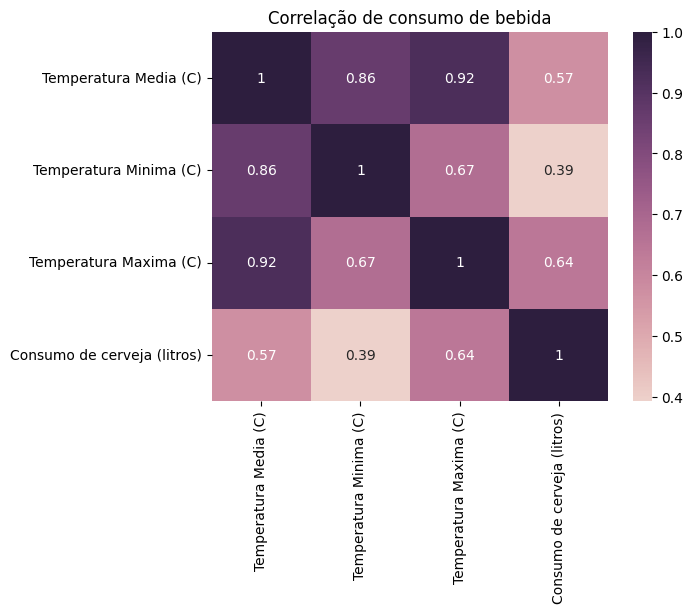

In [3]:
ax = sns.heatmap(df.corr(numeric_only=True), annot=True, cmap=sns.cubehelix_palette(as_cmap=True))
ax.set_title("Correlação de consumo de bebida")
ax=ax

In [4]:
x = df.iloc[:, 0:3].values
y = df.iloc[:, 3].values.reshape(-1, 1)

In [5]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(y)

In [6]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(y).flatten()

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [8]:
from sklearn.model_selection import GridSearchCV

mlp_reg = MLPRegressor(n_iter_no_change=20, early_stopping=True, max_iter=5000, solver='adam', activation='relu')

grid_params = {
  "hidden_layer_sizes": [(30), (35), (40)],
  "tol": [1e-3, 1e-4, 1e-5, 1e-6],
  "epsilon": [1e-4, 1e-5, 1e-6, 1e-7],
}

grid = GridSearchCV(estimator=mlp_reg, param_grid=grid_params, cv=5, n_jobs=-1)
grid.fit(x_train, y_train)

,estimator,MLPRegressor(..._no_change=20)
,param_grid,"{'epsilon': [0.0001, 1e-05, ...], 'hidden_layer_sizes': [30, 35, ...], 'tol': [0.001, 0.0001, ...]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'squared_error'


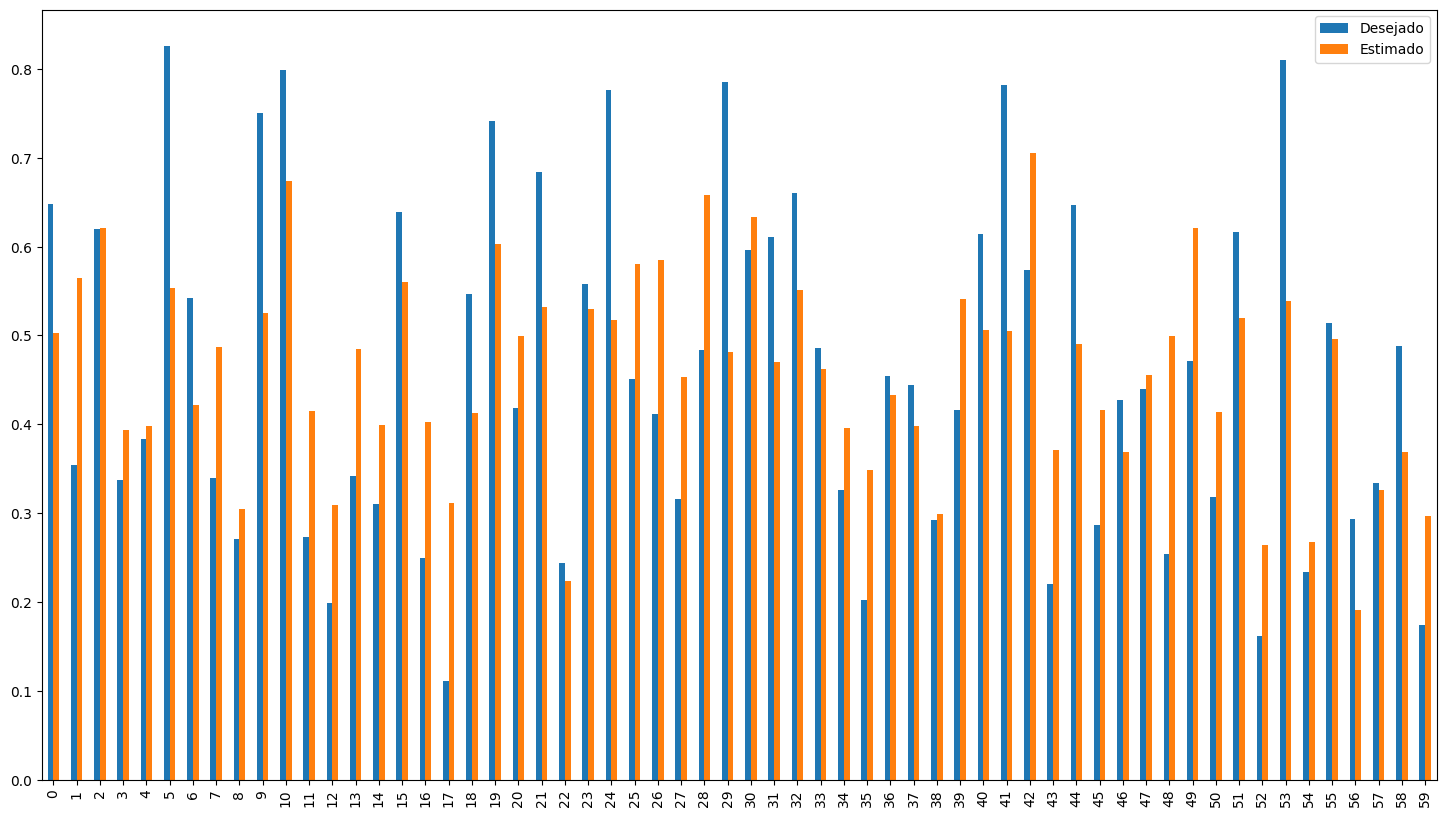

In [9]:
y_predict = grid.best_estimator_.predict(x_test)

df_temp = pd.DataFrame({'Desejado': y_test.flatten(), 'Estimado': y_predict})
df_temp.head(60).plot(kind='bar', figsize=(18,10))
plt.show()

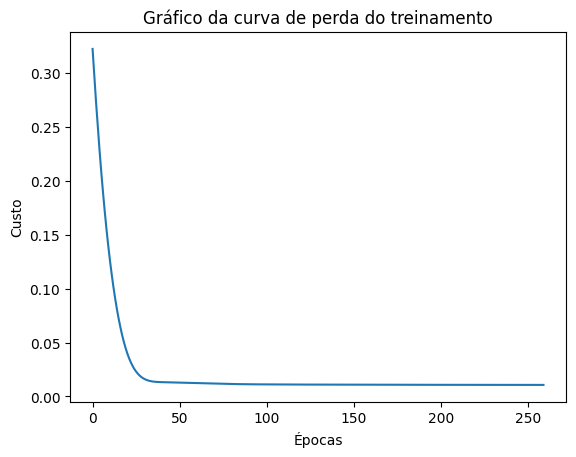

In [10]:
plt.plot(grid.best_estimator_.loss_curve_)
plt.title("Gráfico da curva de perda do treinamento")
plt.xlabel("Épocas")
plt.ylabel('Custo')
plt.show()

In [11]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_predict)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_predict)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Root Mean Squared Error (RMSE):', metrics.root_mean_squared_error(y_test, y_predict)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_predict)) # Apresenta em porcentagem de erros em relação ao desejado.
print('R2: ', metrics.r2_score(y_test, y_predict)) # Apresenta o R2 Score - Representa quanto o modelo está prevendo corretamente, tem uma variação de 0 a 1. Caso seja obtido pelo modelo o R2 = 1, pode ser afirmado que os dados tem relação linear de 100%.
print('Max iterations: ', grid.best_estimator_.n_iter_)

Mean Absolute Error (MAE): 0.11481867329054023
Mean Squared Error (MSE): 0.019344465683472364
Root Mean Squared Error (RMSE): 0.13908438331988376
Mean Absolute Percentage Error (MAPE): 0.288858128804525
R2:  0.4130546549574947
Max iterations:  260


In [20]:
print("Nova predição: ", grid.best_estimator_.predict(x_train[0:10]))
print("Valor esperado: ", y_train[0:10])

Nova predição:  [0.63320378 0.53636053 0.54791905 0.58856681 0.50228368 0.42802328
 0.37416916 0.47645814 0.2801451  0.54449752]
Valor esperado:  [0.59752479 0.43333051 0.3410189  0.69856743 0.37458676 0.33139781
 0.36967026 0.30728151 0.26862762 0.69644825]
